# Técnicas de validación cruzada
Brian Vergara - MLOps

In [19]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_classif

In [32]:
# Cargar el dataset de Digits
digits = load_digits()
X = pd.DataFrame(digits.data)
y = pd.Series(digits.target)

# Mostrar las primeras 10 filas de los features y targets
#print(X.head(5))
#print(y.head(5))


In [21]:
# Verificar la distribución de las etiquetas objetivo
print("Distribución de las etiquetas objetivo:")
print(y.value_counts())

Distribución de las etiquetas objetivo:
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64


In [25]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementación de K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Resultados de CV: {cv_results}")
print(f"Promedio de CV: {cv_results.mean():.2f}")

Resultados de CV: [0.98611111 0.96875    0.95818815 0.97560976 0.97560976]
Promedio de CV: 0.97


In [26]:
# Selección de características utilizando SelectKBest
selector = SelectKBest(f_classif, k=40)
X_new = selector.fit_transform(X, y)

# Dividir los datos en entrenamiento y prueba nuevamente con las características seleccionadas
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Definir el modelo y los hiperparámetros a ajustar
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


C:\Users\bverg\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\bverg\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [27]:
# Realizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

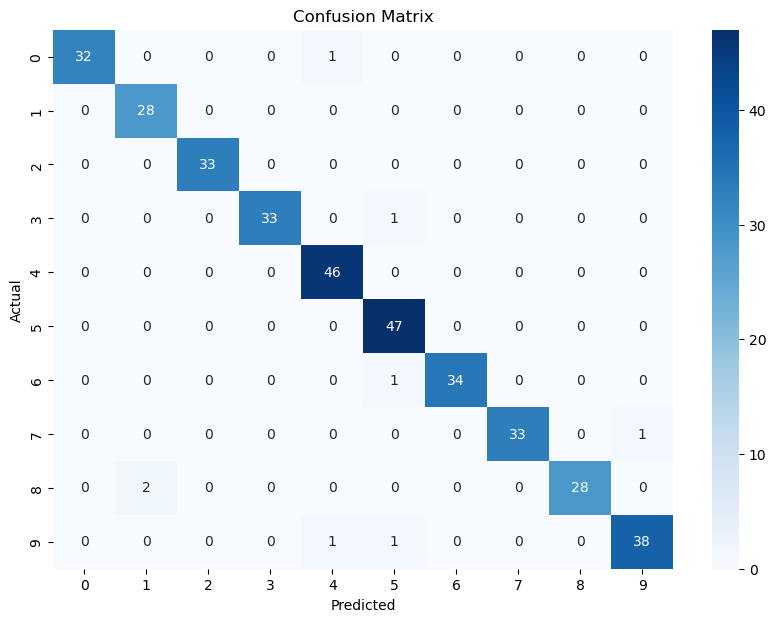

In [29]:
# Visualizar la matriz de confusión usando Matplotlib y Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]], dtype=int64)

# Interpretación de la Matriz de Confusión

Verdaderos Positivos (TP): Representan las instancias que fueron correctamente clasificadas como positivas por el modelo. En la matriz de confusión, son los valores en la diagonal principal (por ejemplo, 32 para la clase ‘0’, 28 para la clase ‘1’, etc.).

Falsos Positivos (FP): Son las instancias que fueron incorrectamente clasificadas como positivas por el modelo. Estos son los valores fuera de la diagonal principal en la fila correspondiente a la clase positiva.

Falsos Negativos (FN): Representan las instancias que fueron incorrectamente clasificadas como negativas por el modelo. Estos son los valores fuera de la diagonal principal en la columna correspondiente a la clase positiva.

Verdaderos Negativos (TN): Son las instancias que fueron correctamente clasificadas como negativas por el modelo. En la matriz de confusión, son los valores fuera de la diagonal principal en las filas y columnas correspondientes a las clases negativas.

# Conclusión

En base a la matriz de confusión, podemos concluir que el modelo tiene un buen rendimiento general, pero hay margen de mejora en la clasificación de las clases 2 y 3. 